# Gaussian Processes Classifier


In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

## Data Pre-Processing

### Importing the dataset

In [8]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y,test_size= 0.25, random_state=0)

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

## Fitting classifier to the Training set

In [33]:
from sklearn.gaussian_process import GaussianProcessClassifier

classifier = GaussianProcessClassifier(kernel = None, random_state=0)
classifier.fit(X_train,y_train)

### Predicting the Test set results
y_pred = classifier.predict(X_test)

### Making the Confusion Matrix and Displaying

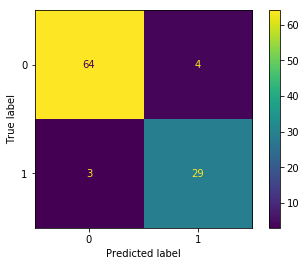

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 


## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


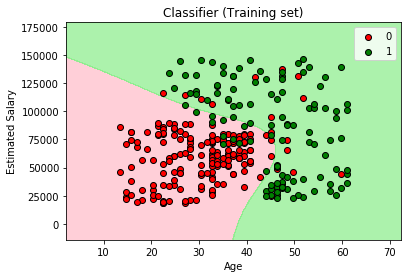

In [41]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
lX1 = np.linspace(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, num = 650)
lX2 = np.linspace(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, num = 650)
X1, X2 = np.meshgrid(lX1, lX2)
X3 = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
X_it = sc.inverse_transform(np.array([X1.ravel(), X2.ravel()]).T)
X1, X2 = X_it[:,0].reshape(X1.shape), X_it[:,1].reshape(X1.shape),
plt.contourf(X1, X2, X3, alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
X_set_it = sc.inverse_transform(X_set)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set_it[y_set == j, 0], X_set_it[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolors='k')
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


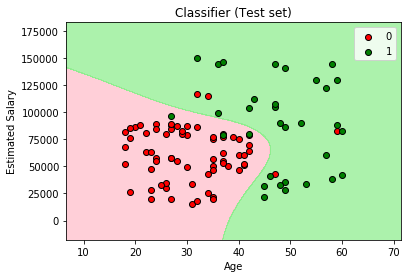

In [39]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
lX1 = np.linspace(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, num = 650)
lX2 = np.linspace(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, num = 650)
X1, X2 = np.meshgrid(lX1, lX2)
X3 = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
X_it = sc.inverse_transform(np.array([X1.ravel(), X2.ravel()]).T)
X1, X2 = X_it[:,0].reshape(X1.shape), X_it[:,1].reshape(X1.shape),
plt.contourf(X1, X2, X3, alpha = 0.75, cmap = ListedColormap(['pink', 'lightgreen'))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
X_set_it = sc.inverse_transform(X_set)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set_it[y_set == j, 0], X_set_it[y_set == j, 1],
                c = ListedColormap(['red', 'green'])(i), label = j, edgecolors='k')
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()